# Exploratory Data Analysis for the NLP Dataset

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dir = os.path.dirname(os.getcwd())
file_dir = os.path.join(base_dir, "datasets", "amazon_alexa.tsv")
reviews_df = pd.read_csv(file_dir, sep = "\t")

In [3]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# TAREA #3: EXPLORAR EL DATASET

<Axes: >

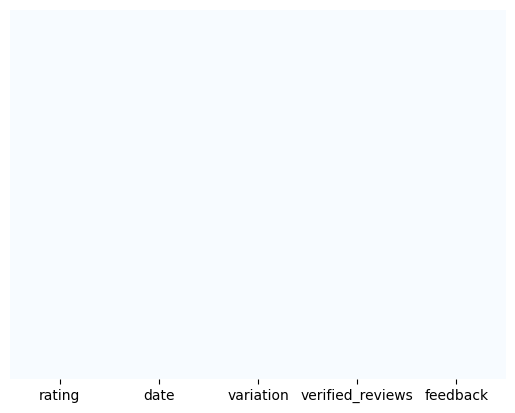

In [7]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

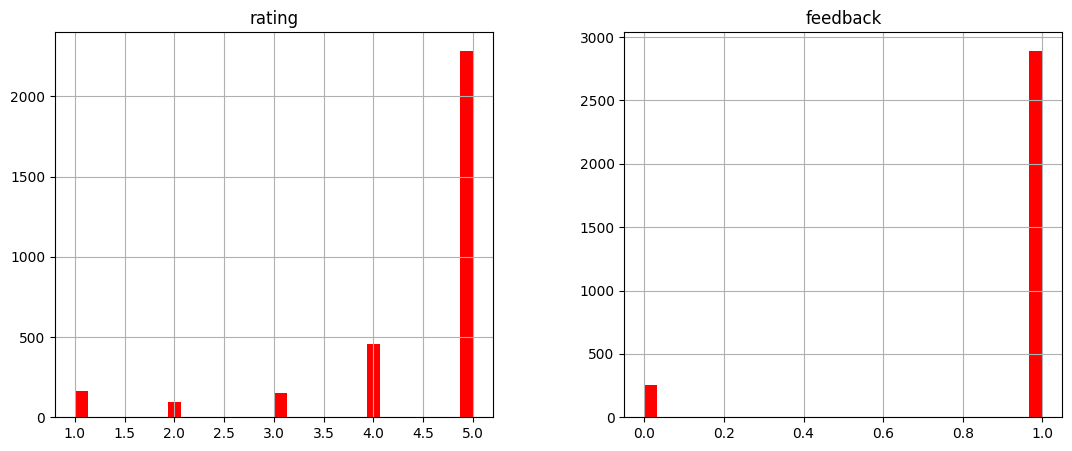

In [8]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

In [ ]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

In [ ]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [ ]:
reviews_df.length.describe()

In [ ]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

In [ ]:
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

In [ ]:
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

In [ ]:
positive = reviews_df[reviews_df['feedback'] == 1]

In [ ]:
negative = reviews_df[reviews_df['feedback'] == 0]

In [ ]:
negative

In [ ]:
positive

In [ ]:
sns.countplot(reviews_df['feedback'], label = "Count")

In [ ]:
sns.countplot(x = 'rating', data = reviews_df)

In [ ]:
reviews_df['rating'].hist(bins = 5)

In [ ]:
plt.figure(figsize=(40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette='deep')

In [ ]:
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

In [ ]:
print(sentences)

In [ ]:
sentences_as_one_string = " ".join(sentences)

In [ ]:
sentences_as_one_string

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
negative_list = negative['verified_reviews'].tolist()
negative_list

In [ ]:
negative_sentences_as_one_string = " ".join(negative_list)

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# TAREA #4: LLEVAR A CABO LA LIMPIEZA DE DATOS

In [ ]:
reviews_df.head()

In [ ]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [ ]:
reviews_df

In [ ]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)

In [ ]:
variation_dummies

In [ ]:
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [ ]:
reviews_df = pd.concat([reviews_df, variation_dummies],axis = 1)

In [ ]:
reviews_df

# TAREA #5: APRENDE A ELIMINAR LOS SÍGNOS DE PUNTUACIÓN DEL TEXTO

In [ ]:
import string
string.punctuation

In [ ]:
Test = "Hello Mr. Future, I am so happy to be learning AI now!!!"

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

In [ ]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

# TAREA 6: ENTENDER COMO LIDIAR LAS STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
Test_punc_removed_join

In [ ]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean

In [ ]:
mini_challenge = "Here is a mini challenge, that will teach you how to remove stopwords and punctuations!!"

In [ ]:
challenge = [char for char in mini_challenge if char not in string.punctuation]
challenge = ''.join(challenge)
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
challenge

# TAREA 7: ENTENDER EL PROCESO DE TOKENIZACIÓN

![alt text](https://drive.google.com/uc?id=10dlXiQMdvzLJwNqhnvylAix9_LUQCGQa)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
print(X.toarray())

In [ ]:
mini_challenge = ["Hello World", "Hello Hello World", "Hello World world world"]

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(vectorizer_challenge.get_feature_names_out())
print(X_challenge.toarray())

# TAREA #8: LLEVAR A CABO LA LIMPIEZA DE DATOS APLICANDO TODO LO QUE HEMOS APRENDIDO!!

In [ ]:
# Definimos un pipeline para limpiar todos los mensajes
# El pipeline realizamos lo siguiente: (1) eliminar signos de putuación, (2) eliminar las stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean


In [ ]:
# Probemos la función que acabamos de crear

reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [ ]:
print(reviews_df_clean[3])

In [ ]:
print(reviews_df['verified_reviews'][3])

In [ ]:
reviews_df_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names_out())

In [ ]:
print(reviews_countvectorizer.toarray())

In [ ]:
reviews_countvectorizer.shape

In [ ]:
reviews_df

In [ ]:
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [ ]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [ ]:
reviews_df

In [ ]:
X = reviews_df.drop(['feedback'], axis = 1)
X

In [ ]:
y = reviews_df['feedback']
y

# TAREA #9: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE NAÏVE BAYES

![alt text](https://drive.google.com/uc?id=1AyMGr5pZWQ3frRD_84NAM1k765dZNm0S)

![alt text](https://drive.google.com/uc?id=1lLQR8v2Iu8-uXzC7sgNdzVAXjtAkvh2z)

![alt text](https://drive.google.com/uc?id=1KuifCAosRqw0VG0d9itxul4Yjm1LFfHX)

![alt text](https://drive.google.com/uc?id=1XOfRNtgEn6NQcDu-kats3rVMh75hrzZW)

![alt text](https://drive.google.com/uc?id=1JYeNmZFOMDWzzW82ARq851WVhi38pMmp)

![alt text](https://drive.google.com/uc?id=12kQKrWY3pvAWaLazeLSfUrgiQIisd0qX)

![alt text](https://drive.google.com/uc?id=1q3SWsZkfUtxnI6r-uqBZvK8KSnZ_R2qj)

![alt text](https://drive.google.com/uc?id=1swfSHTNQZGOwbPOSc6J775Fe8YDT7A2J)

# TAREA #10: ENTRENAR UN MODELO CLASIFICADOR DE NAÏVE BAYES

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)

# TAREA #11: VALIDAR LA EFICACIA DEL MODELO ENTRENADO

![alt text](https://drive.google.com/uc?id=1ZKbO9tQH3qh0IjKwgOAJ37ghWzUVcb8O)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_train  = nb_multinomial.predict(X_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [ ]:
y_predict_test = nb_multinomial.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


In [ ]:
print(classification_report(y_test, y_predict_test))

# TAREA #12: RETO FINAL - ENTRENAR Y EVALUAR UN MODELO CLASIFICADOR BASADO EN LA REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
print("Accuracy {} %".format(100*accuracy_score(y_test, y_pred)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

# UN TRABAJO EXCELENTE! PUEDES SENTIRTE ORGULLOSO DE TODO LO QUE ACABAS DE APRENDER